Link for mozilla firefox<br>
https://www.mozilla.org/en-US/firefox/download/thanks/<br>
Link for forefox's driver<br>
https://github.com/mozilla/geckodriver/releases<br>

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import heapq

In [9]:

def main(web_address, search):
    path = r'C:\Users\Unknown\Downloads\chromedriver_win32\chromedriver'
    browser = webdriver.Chrome(service=Service(path))
    
    browser.get(web_address)

    elem = browser.find_element(By.NAME, 'search_query')  # Find the search box
    elem.send_keys(search)

    searchButton = browser.find_element(By.ID, 'search-icon-legacy')
    time.sleep(5)
    searchButton.click()
    time.sleep(5)
    df = pd.DataFrame(columns=['Title', 'Link', 'Description', 'Views','U_date', 'Channel name', 'Channel link'])
    for i in range(1, 11):
        lst = []
        title = browser.find_element(By.XPATH, f'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div[2]/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[{i}]/div[1]/div/div[1]/div/h3/a').text

        link = browser.find_element(By.XPATH, f'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div[2]/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[{i}]/div[1]/div/div[1]/div/h3/a').get_attribute("href")

        description = browser.find_element(By.XPATH, f'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div[2]/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[{i}]/div[1]/div/div[3]/yt-formatted-string').text

        views = browser.find_element(By.XPATH, f'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div[2]/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[{i}]/div[1]/div/div[1]/ytd-video-meta-block/div[1]/div[2]/span[1]').text

        u_date = browser.find_element(By.XPATH, f'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div[2]/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[{i}]/div[1]/div/div[1]/ytd-video-meta-block/div[1]/div[2]/span[2]').text

        ch_name = browser.find_element(By.XPATH, f'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div[2]/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[{i}]/div[1]/div/div[2]/ytd-channel-name/div/div/yt-formatted-string/a').text

        ch_link = browser.find_element(By.XPATH, f'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div[2]/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[{i}]/div[1]/div/div[2]/ytd-channel-name/div/div/yt-formatted-string/a').get_attribute("href")

        lst = [title,link,description,views,u_date,ch_name,ch_link]
        df.loc[len(df)] = lst
    return df

In [10]:
df = main('http://www.youtube.com/', 'panda animal')
df

,Title,Link,Description,Views,U_date,Channel name,Channel link
0,Life of Rare Panda – National Geographic And W...,https://www.youtube.com/watch?v=yYp_Shk7XcI,"The giant panda (Ailuropoda melanoleuca, liter...",2.7M views,4 years ago,Beautiful 4K And HDR Videos,https://www.youtube.com/@beautiful4kandhdrvide...
1,Giant Pandas 101 | Nat Geo Wild,https://www.youtube.com/watch?v=dqT-UlYlg1s,#NatGeoWILD #Pandas #Educational About Nationa...,3.4M views,5 years ago,Nat Geo WILD,https://www.youtube.com/@NatGeoWild
2,Cute Animals - Cute Baby Panda Videos Compilat...,https://www.youtube.com/watch?v=wPTN0Wfgjg0,Cute Animals - Cute Baby Panda Videos Compilat...,6.8M views,4 years ago,Cute Animal Planet,https://www.youtube.com/@fpenne
3,🐼 Panda Funny Moment Videos Compilation,https://www.youtube.com/watch?v=D7xWXk5T3-g,Panda Funny Moment Videos Compilation! SUBSCRI...,3.9M views,2 years ago,Panda Story,https://www.youtube.com/@PandaStoryVideo
4,AWW SO CUTE!!! BABY PANDAS Playing With Zookee...,https://www.youtube.com/watch?v=l73rmrLTHQc,Funny and cute baby pandas compilation/Baby Pa...,17M views,2 years ago,Paws and Pals,https://www.youtube.com/@pawsandpals2632
5,Cute panda video collection，Filmed in Chinese ...,https://www.youtube.com/watch?v=Z98ZxYFsIWo,Cute panda video collection .This was taken in...,11M views,4 years ago,Little pet cute,https://www.youtube.com/@littlepetcute5383
6,Raising Cute Pandas: It's Complicated | Nation...,https://www.youtube.com/watch?v=v_cpPMjE0vU,#NationalGeographic #Pandas #BabyAnimals About...,10M views,6 years ago,National Geographic,https://www.youtube.com/@NatGeo
7,Panda Teamwork - Aww Cute Panda - Funniest Ani...,https://www.youtube.com/watch?v=1Pzuju4srCQ,Panda Teamwork - Aww Cute Panda - Funniest Ani...,14M views,2 years ago,Pets Island,https://www.youtube.com/@PetsIsland
8,Cute alert! Giant panda cuddles with keeper du...,https://www.youtube.com/watch?v=Kz52DfoeNlM,"While helping one panda take a shower, a panda...",11M views,4 years ago,CGTN,https://www.youtube.com/@cgtn
9,#Funny #animals #cats 🐲,https://www.youtube.com/shorts/rMb9XQFnupQ,here we have some funny animals like dogs and ...,237K views,1 day ago,Panda Shorts,https://www.youtube.com/@PandaShorts


In [11]:
def views_prp(df):
# For views
    lst = []
    for i in df.index:
        if df['Views'][i][-7].isnumeric():
            new_d = (float(df['Views'][i][:-6]))*1
        if df['Views'][i][-7] == "K":
            new_d = (float(df['Views'][i][:-7]))*1000
        if df['Views'][i][-7] == "M":
            new_d = (float(df['Views'][i][:-7]))*1000000
        if df['Views'][i][-7] == "B":
            new_d = (float(df['Views'][i][:-7]))*1000000000
        lst.append(new_d)
    df['Views'] = lst
    return df

In [12]:
df = views_prp(df)
df

,Title,Link,Description,Views,U_date,Channel name,Channel link
0,Life of Rare Panda – National Geographic And W...,https://www.youtube.com/watch?v=yYp_Shk7XcI,"The giant panda (Ailuropoda melanoleuca, liter...",2700000.0,4 years ago,Beautiful 4K And HDR Videos,https://www.youtube.com/@beautiful4kandhdrvide...
1,Giant Pandas 101 | Nat Geo Wild,https://www.youtube.com/watch?v=dqT-UlYlg1s,#NatGeoWILD #Pandas #Educational About Nationa...,3400000.0,5 years ago,Nat Geo WILD,https://www.youtube.com/@NatGeoWild
2,Cute Animals - Cute Baby Panda Videos Compilat...,https://www.youtube.com/watch?v=wPTN0Wfgjg0,Cute Animals - Cute Baby Panda Videos Compilat...,6800000.0,4 years ago,Cute Animal Planet,https://www.youtube.com/@fpenne
3,🐼 Panda Funny Moment Videos Compilation,https://www.youtube.com/watch?v=D7xWXk5T3-g,Panda Funny Moment Videos Compilation! SUBSCRI...,3900000.0,2 years ago,Panda Story,https://www.youtube.com/@PandaStoryVideo
4,AWW SO CUTE!!! BABY PANDAS Playing With Zookee...,https://www.youtube.com/watch?v=l73rmrLTHQc,Funny and cute baby pandas compilation/Baby Pa...,17000000.0,2 years ago,Paws and Pals,https://www.youtube.com/@pawsandpals2632
5,Cute panda video collection，Filmed in Chinese ...,https://www.youtube.com/watch?v=Z98ZxYFsIWo,Cute panda video collection .This was taken in...,11000000.0,4 years ago,Little pet cute,https://www.youtube.com/@littlepetcute5383
6,Raising Cute Pandas: It's Complicated | Nation...,https://www.youtube.com/watch?v=v_cpPMjE0vU,#NationalGeographic #Pandas #BabyAnimals About...,10000000.0,6 years ago,National Geographic,https://www.youtube.com/@NatGeo
7,Panda Teamwork - Aww Cute Panda - Funniest Ani...,https://www.youtube.com/watch?v=1Pzuju4srCQ,Panda Teamwork - Aww Cute Panda - Funniest Ani...,14000000.0,2 years ago,Pets Island,https://www.youtube.com/@PetsIsland
8,Cute alert! Giant panda cuddles with keeper du...,https://www.youtube.com/watch?v=Kz52DfoeNlM,"While helping one panda take a shower, a panda...",11000000.0,4 years ago,CGTN,https://www.youtube.com/@cgtn
9,#Funny #animals #cats 🐲,https://www.youtube.com/shorts/rMb9XQFnupQ,here we have some funny animals like dogs and ...,237000.0,1 day ago,Panda Shorts,https://www.youtube.com/@PandaShorts


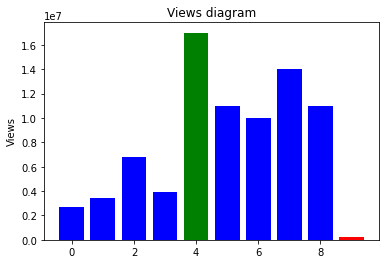

In [14]:
fig, ax = plt.subplots()

index = df.index
views = df['Views']
bar_colors = []

for i in df['Views']:
    if i == df['Views'].max():
        bar_colors.append('green')
    elif i < 1000000:
        bar_colors.append('red')
    else:
        bar_colors.append('blue')


ax.bar(index, views, color=bar_colors)

ax.set_ylabel('Views')
ax.set_title('Views diagram')
# ax.legend(title='Fruit color')

plt.show()

In [ ]:
path = r'C:\Users\Unknown\Downloads\chromedriver_win32\chromedriver'
browser = webdriver.Chrome(service=Service(path))
for i_d in range(len(df['Link'])):
    
    id = df['Link'][i_d][-11:]

    browser.get(f'https://img.youtube.com/vi/{id}/maxresdefault.jpg')
    browser.save_screenshot(f"images/{i_d}.png")

In [19]:
def ch_videos(ch_index, df):
    path = r'C:\Users\Unknown\Downloads\chromedriver_win32\chromedriver'
    browser = webdriver.Chrome(service=Service(path))
    ch_name = df['Channel link'][ch_index].split('@')[1]
    browser.get(f'https://www.youtube.com/@{ch_name}/videos')
    browser.set_window_size(1024, 600)
    browser.maximize_window()
    time.sleep(2)
    browser.refresh()
    
    SCROLL_PAUSE_TIME = 3

    subscribers = browser.find_element(By.XPATH, '/html/body/ytd-app/div[1]/ytd-page-manager/ytd-browse/div[3]/ytd-c4-tabbed-header-renderer/tp-yt-app-header-layout/div/tp-yt-app-header/div[2]/div[2]/div/div[1]/div/div[1]/yt-formatted-string[2]').text
    # Get scroll height
    last_height = browser.execute_script("return document.documentElement.scrollHeight")

    while True:
        # Scroll down to bottom
        browser.execute_script("window.scrollTo(0, arguments[0]);", last_height)
        # Wait to load page
        time.sleep(SCROLL_PAUSE_TIME)

        # Calculate new scroll height and compare with last scroll height
        new_height = browser.execute_script("return document.documentElement.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height
    time.sleep(5)
    data = []
    counter = 0
    row_counter = 1
    while True:
        counter = counter + 1
        try:
            title = browser.find_element(By.XPATH, f'''/html/body/ytd-app/div[1]/ytd-page-manager/ytd-browse/
                                                    ytd-two-column-browse-results-renderer/div[1]/ytd-rich-grid-renderer/
                                                    div[6]/ytd-rich-grid-row[{row_counter}]/div/ytd-rich-item-renderer[{counter}]/
                                                    div/ytd-rich-grid-media/div[1]/div[2]/div[1]/h3/a''').get_attribute('title')
            views = browser.find_element(By.XPATH, f'''/html/body/ytd-app/div[1]/ytd-page-manager/ytd-browse/
                                                    ytd-two-column-browse-results-renderer/div[1]/ytd-rich-grid-renderer/
                                                    div[6]/ytd-rich-grid-row[{row_counter}]/div/ytd-rich-item-renderer[{counter}]/div/
                                                    ytd-rich-grid-media/div[1]/div[2]/div[1]/ytd-video-meta-block/
                                                    div[1]/div[2]/span[1]''').text
            link = browser.find_element(By.XPATH, f'''/html/body/ytd-app/div[1]/ytd-page-manager/ytd-browse/
                                                    ytd-two-column-browse-results-renderer/div[1]/ytd-rich-grid-renderer/
                                                    div[6]/ytd-rich-grid-row[{row_counter}]/div/ytd-rich-item-renderer[{counter}]/
                                                    div/ytd-rich-grid-media/div[1]/div[2]/div[1]/h3/a''').get_attribute('href')

            data.append([title, views, link])

            if counter==4:
                counter = 0
                row_counter = row_counter + 1
        except:
            break
    # Create pandas DataFrame
    df1 = pd.DataFrame(data, columns=['Title', 'Views', 'Link'])
    browser.quit()
    return df1
    

In [20]:
df1 = ch_videos(7, df)
df1

,Title,Views,Link
0,Dog Reaction to Cutting Cake 🐶 - Funny Dog Cak...,52K views,https://www.youtube.com/watch?v=aeHvYrLRGQw
1,Oh No! Scared Dogs Reacting To Weird Things - ...,55K views,https://www.youtube.com/watch?v=70qw35ND8Sc
2,Angry Animals - The Funniest Animal Reactions ...,15K views,https://www.youtube.com/watch?v=V7QKpvLqmEs
3,Funny Dogs Acting Scared - TRY NOT TO LAUGH | ...,119K views,https://www.youtube.com/watch?v=TcIjAedFL2E
4,Dog Reactions To Being Scared By Leopards - Fu...,36K views,https://www.youtube.com/watch?v=fxsYv-X2BvA
5,Funny Animal Videos: Pets That Got The Wrong I...,1M views,https://www.youtube.com/watch?v=fSe8fRikNEk
6,The Funniest Dog Fails Ever Caught On Camera! ...,813K views,https://www.youtube.com/watch?v=B0PuYGU0m8Q
7,"Best of Funny Dog Reactions - Scared, Confused...",423K views,https://www.youtube.com/watch?v=aLy15pKPdIE
8,Can't Stop Laughing: Hilarious Dog Reaction Vi...,57K views,https://www.youtube.com/watch?v=376yjUsRPBk
9,The Funniest Dog Videos That Are Impossible No...,49K views,https://www.youtube.com/watch?v=e7PzYHrzdMk


In [38]:
def get_likes(df):
    path = r'C:\Users\Unknown\Downloads\chromedriver_win32\chromedriver'
    browser = webdriver.Chrome(service=Service(path))
    lst_likes = []
    for lnk in range(len(df['Link'])):

        likes = df['Link'][lnk]

        browser.get(likes)
        time.sleep(5)
        like = browser.find_element(By.XPATH, '/html/body/ytd-app/div[1]/ytd-page-manager/ytd-watch-flexy/div[5]/div[1]/div/div[2]/ytd-watch-metadata/div/div[2]/div[2]/div/div/ytd-menu-renderer/div[1]/ytd-segmented-like-dislike-button-renderer/div[1]/ytd-toggle-button-renderer/yt-button-shape/button/div[2]/span').text
        lst_likes.append(like)
    browser.quit()
    df['Likes'] = lst_likes
    time.sleep(2)
    
    lst = []
    for i in df1.index:
        if df1['Likes'][i][-1].isnumeric():
            new_d = (float(df1['Likes'][i][:]))*1
        if df1['Likes'][i][-1] == "K":
            new_d = (float(df1['Likes'][i][:-1]))*1000
        if df1['Likes'][i][-1] == "M":
            new_d = (float(df1['Likes'][i][:-1]))*1000000
        if df1['Likes'][i][-1] == "B":
            new_d = (float(df1['Likes'][i][:-1]))*1000000000
        lst.append(new_d)
    df1['Likes'] = lst
    time.sleep(2)

    return df

In [39]:
df1 = get_likes(df1)
df1.head()

,Title,Views,Link,Likes
0,Dog Reaction to Cutting Cake 🐶 - Funny Dog Cak...,52000.0,https://www.youtube.com/watch?v=aeHvYrLRGQw,372.0
1,Oh No! Scared Dogs Reacting To Weird Things - ...,55000.0,https://www.youtube.com/watch?v=70qw35ND8Sc,518.0
2,Angry Animals - The Funniest Animal Reactions ...,15000.0,https://www.youtube.com/watch?v=V7QKpvLqmEs,184.0
3,Funny Dogs Acting Scared - TRY NOT TO LAUGH | ...,119000.0,https://www.youtube.com/watch?v=TcIjAedFL2E,990.0
4,Dog Reactions To Being Scared By Leopards - Fu...,36000.0,https://www.youtube.com/watch?v=fxsYv-X2BvA,339.0


In [40]:
df1 = views_prp(df1)
df1.head()

,Title,Views,Link,Likes
0,Dog Reaction to Cutting Cake 🐶 - Funny Dog Cak...,52000.0,https://www.youtube.com/watch?v=aeHvYrLRGQw,372.0
1,Oh No! Scared Dogs Reacting To Weird Things - ...,55000.0,https://www.youtube.com/watch?v=70qw35ND8Sc,518.0
2,Angry Animals - The Funniest Animal Reactions ...,15000.0,https://www.youtube.com/watch?v=V7QKpvLqmEs,184.0
3,Funny Dogs Acting Scared - TRY NOT TO LAUGH | ...,119000.0,https://www.youtube.com/watch?v=TcIjAedFL2E,990.0
4,Dog Reactions To Being Scared By Leopards - Fu...,36000.0,https://www.youtube.com/watch?v=fxsYv-X2BvA,339.0


In [41]:
def likes_ratio(df):
    lst_ratio = []
    for i in df.index:
        ratio = (df['Likes'][i] * 100 / df['Views'][i])
        lst_ratio.append(round(ratio, 2))
    df['Likes_ratio'] = lst_ratio
    return df

In [42]:
df1 = likes_ratio(df1)
df1.head()

,Title,Views,Link,Likes,Likes_ratio
0,Dog Reaction to Cutting Cake 🐶 - Funny Dog Cak...,52000.0,https://www.youtube.com/watch?v=aeHvYrLRGQw,372.0,0.72
1,Oh No! Scared Dogs Reacting To Weird Things - ...,55000.0,https://www.youtube.com/watch?v=70qw35ND8Sc,518.0,0.94
2,Angry Animals - The Funniest Animal Reactions ...,15000.0,https://www.youtube.com/watch?v=V7QKpvLqmEs,184.0,1.23
3,Funny Dogs Acting Scared - TRY NOT TO LAUGH | ...,119000.0,https://www.youtube.com/watch?v=TcIjAedFL2E,990.0,0.83
4,Dog Reactions To Being Scared By Leopards - Fu...,36000.0,https://www.youtube.com/watch?v=fxsYv-X2BvA,339.0,0.94


C:\Users\Unknown\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Unknown\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 56374 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Unknown\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 56891 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Unknown\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Unknown\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 56374 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Unknown\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 56891 missin

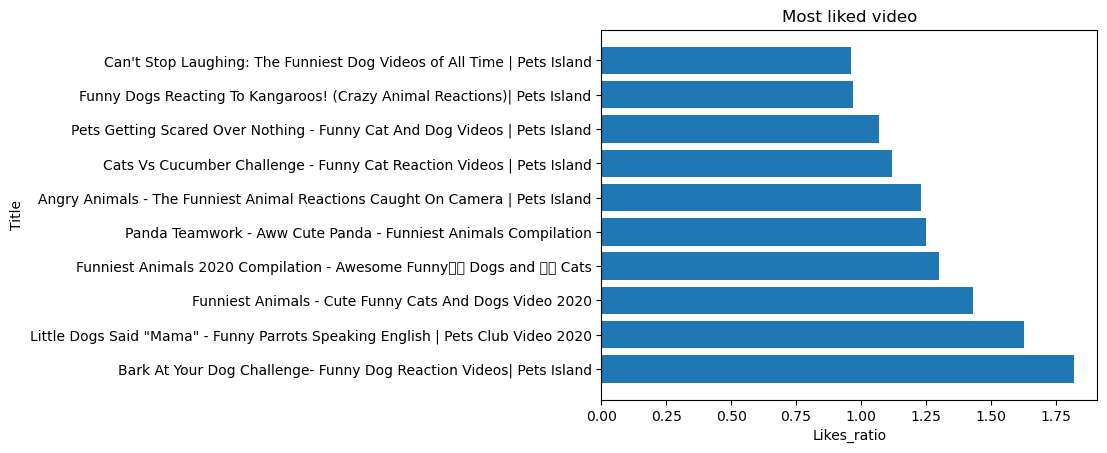

In [43]:
plt.rcdefaults()
fig, ax = plt.subplots()

max_5 =  heapq.nlargest(10, df1['Likes_ratio'])
labels = []
for mx in max_5:
    df2=df1.loc[df1['Likes_ratio'] == mx, 'Title'].iloc[0]
    labels.append(df2)


ax.barh(labels, max_5, align='center')
# ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Likes_ratio')
ax.set_ylabel('Title')
ax.set_title('Most liked video')

plt.show()

C:\Users\Unknown\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Unknown\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 56374 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Unknown\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 56891 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Unknown\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Unknown\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 56374 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Unknown\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 56891 missin

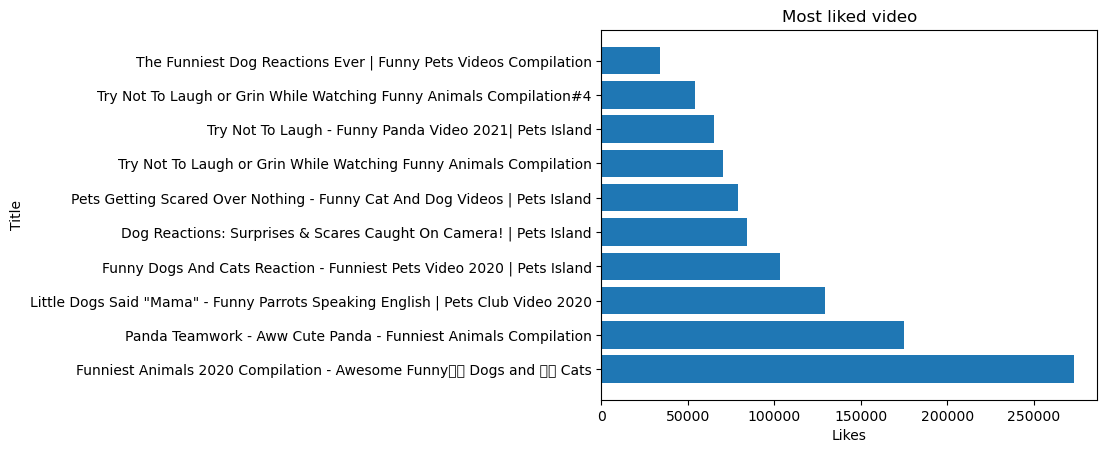

In [45]:
plt.rcdefaults()
fig, ax = plt.subplots()

max_5 =  heapq.nlargest(10, df1['Likes'])
labels = []
for mx in max_5:
    df2=df1.loc[df1['Likes'] == mx, 'Title'].iloc[0]
    labels.append(df2)


ax.barh(labels, max_5, align='center')
# ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Likes')
ax.set_ylabel('Title')
ax.set_title('Most liked video')

plt.show()

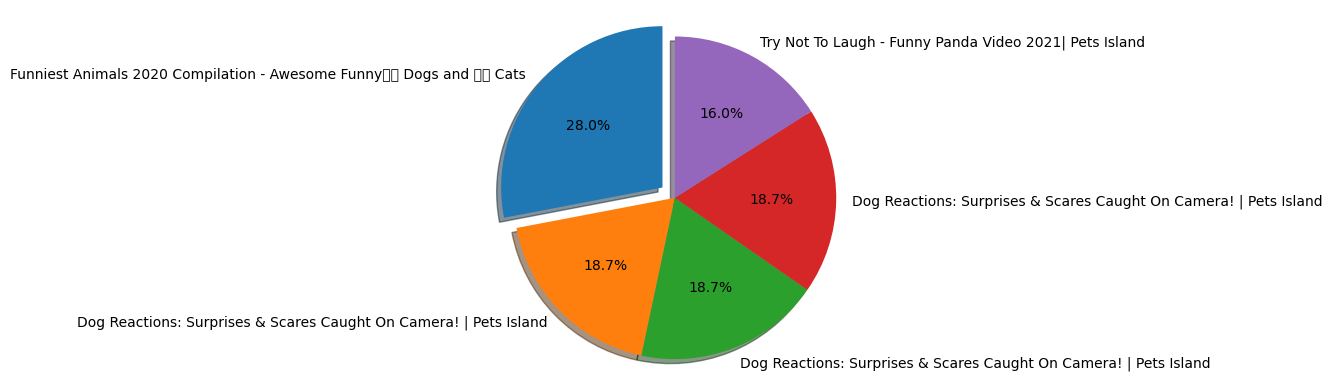

In [47]:
max_5 =  heapq.nlargest(5, df1['Views'])
labels = []
for mx in max_5:
    df2=df1.loc[df1['Views'] == mx, 'Title'].iloc[0]
    labels.append(df2)

explode = (0.1, 0, 0, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(max_5, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()